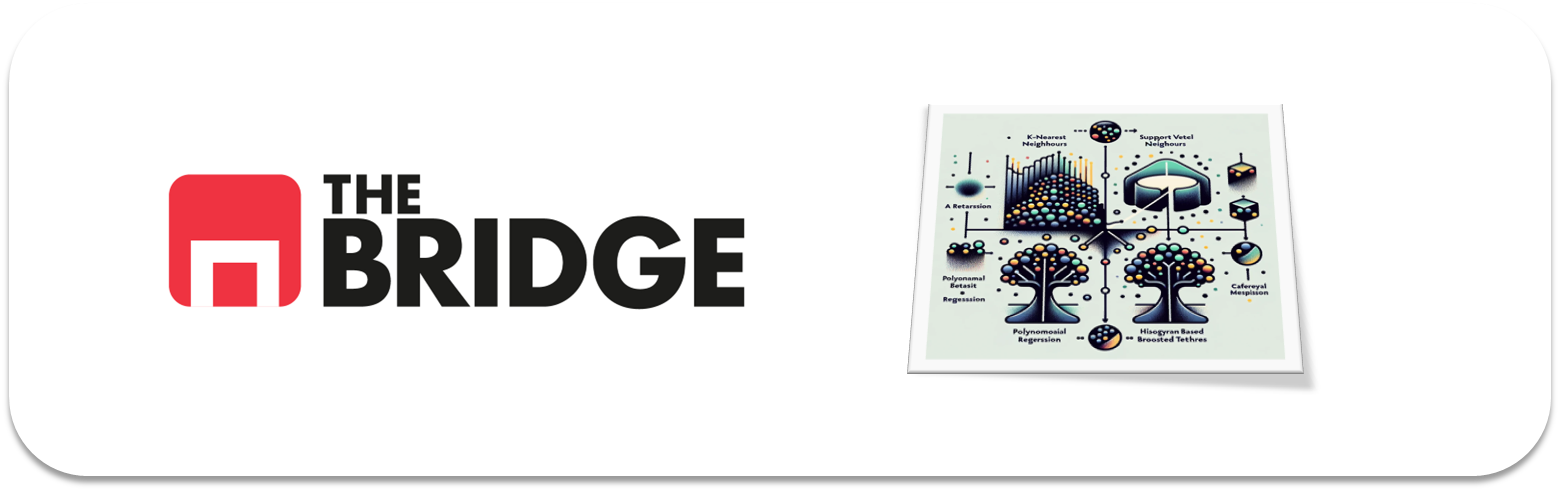

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [81]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep ="|")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


El primer objetivo es un problema de clasificación.

In [5]:
target_1 = 'quality'

In [6]:
df[target_1].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [7]:
df['quality'] = df['quality'] - 3 #para evitar un error que me da con XGB

El segundo objetivo es un problema de clasificación.

In [8]:
target_2 = 'alcohol'

In [9]:
df[target_2].value_counts()

alcohol
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
11.550000      1
12.333333      1
10.566667      1
10.750000      1
11.433333      1
Name: count, Length: 111, dtype: int64

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [10]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify= df['quality'], random_state= 42)

In [11]:
features_cat = 'class'

In [12]:
features_num_1 = [col for col in train_set.columns.to_list()]

In [13]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'class']

In [14]:
features_num_1.remove(features_cat)

In [15]:
features_num_1.remove(target_1)

In [16]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

<Axes: xlabel='class', ylabel='count'>

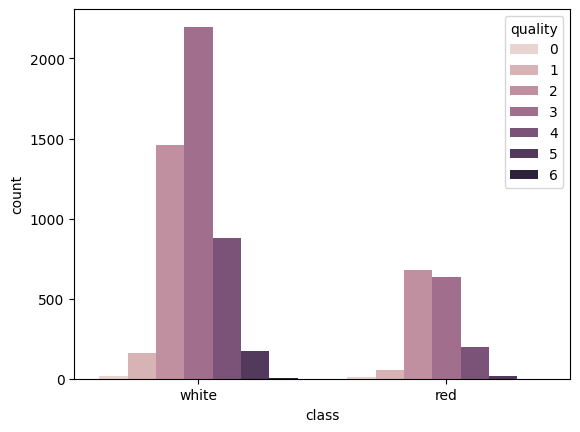

In [17]:
# distribución var.categórica
sns.countplot(x=features_cat, hue=target_1, data=df)

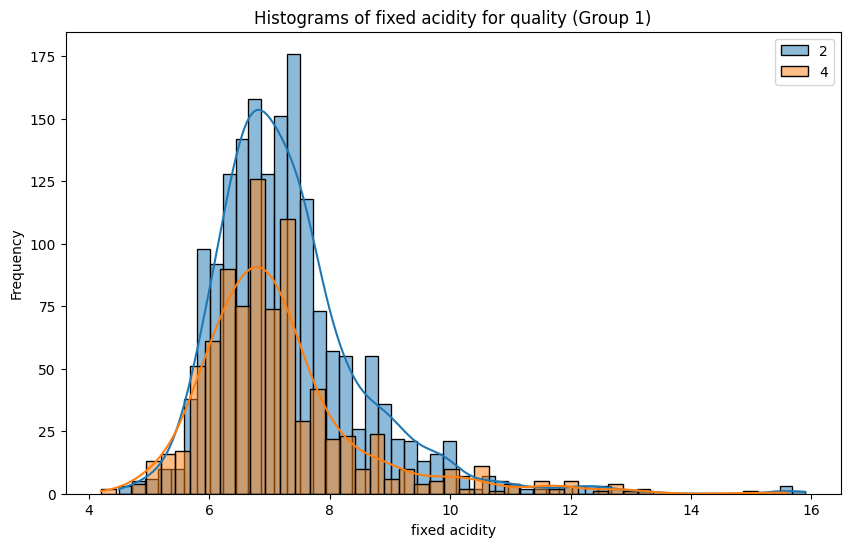

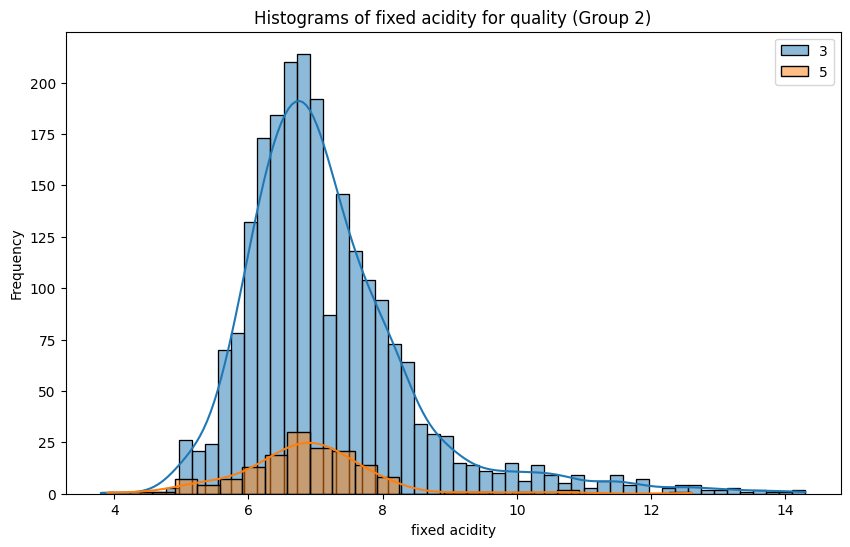

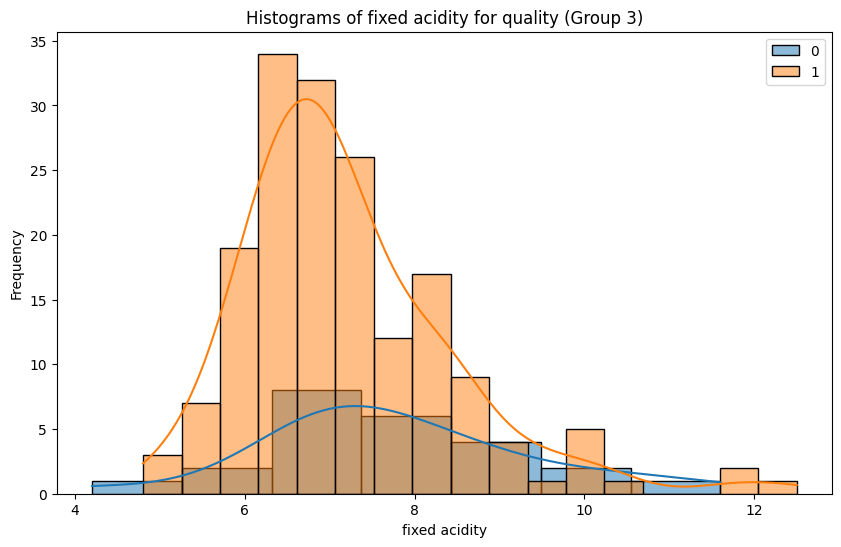

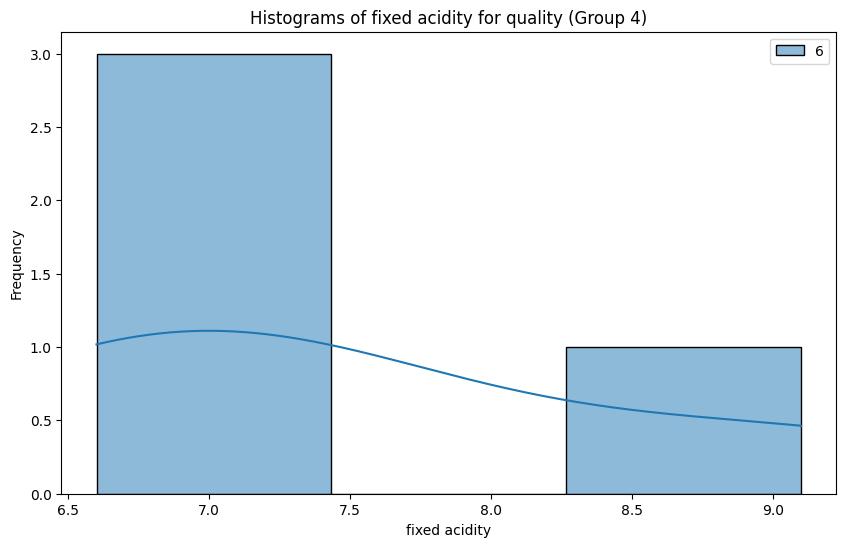

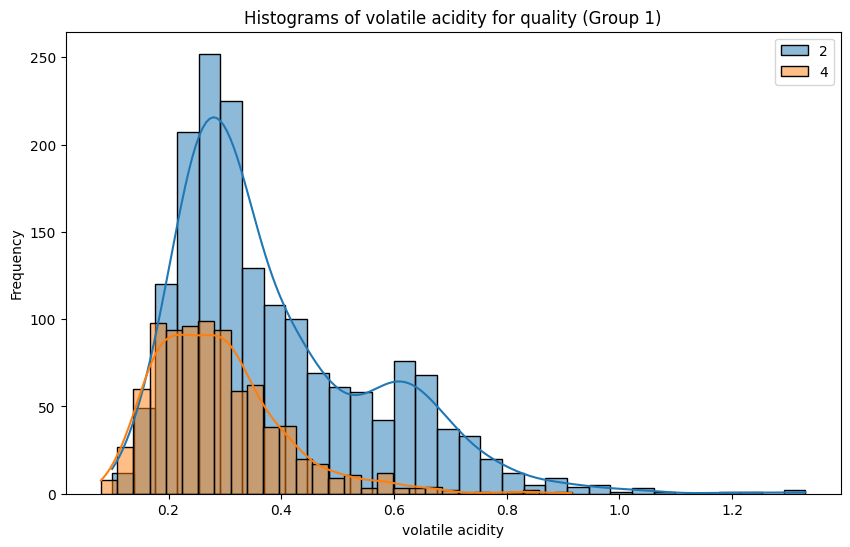

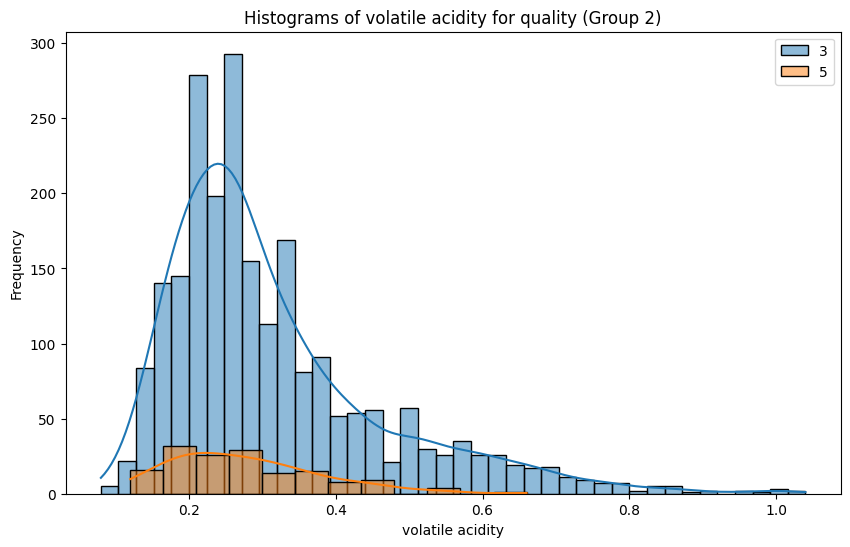

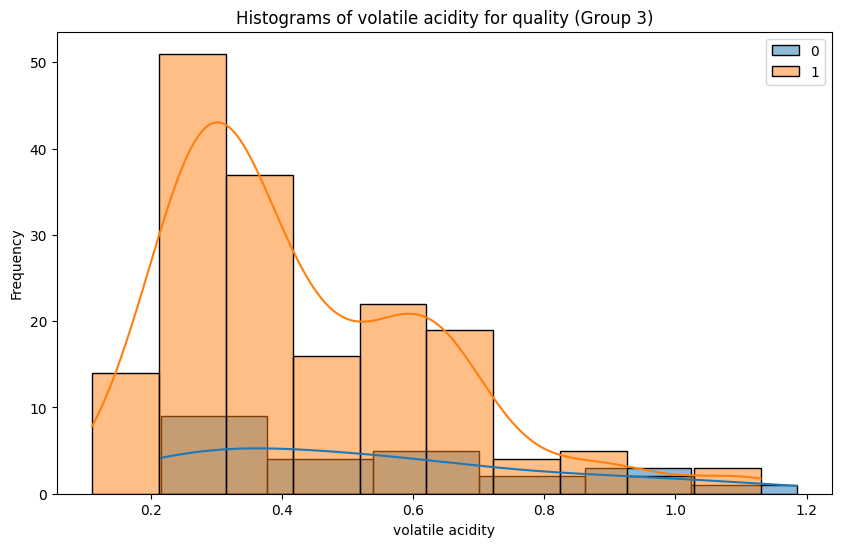

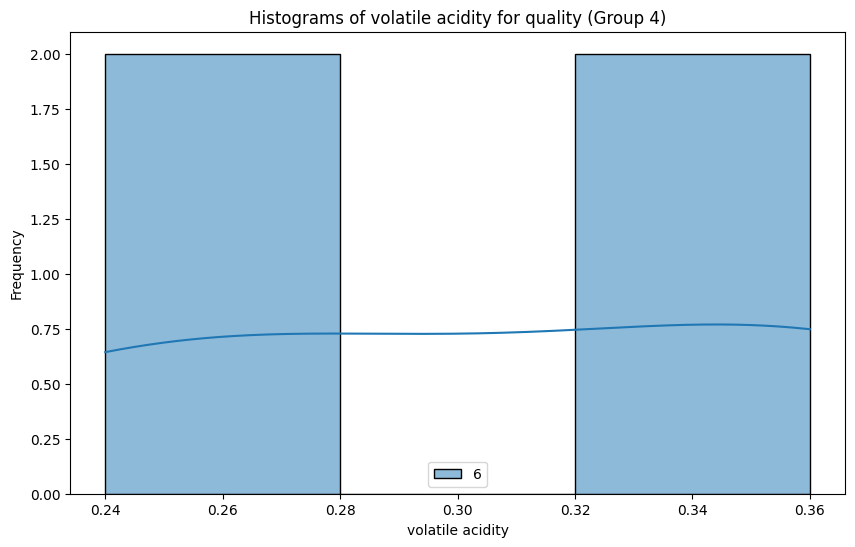

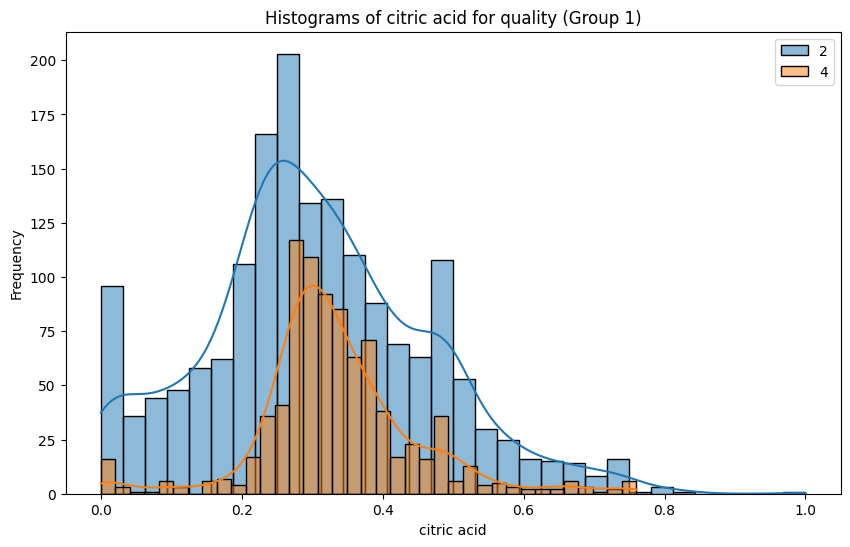

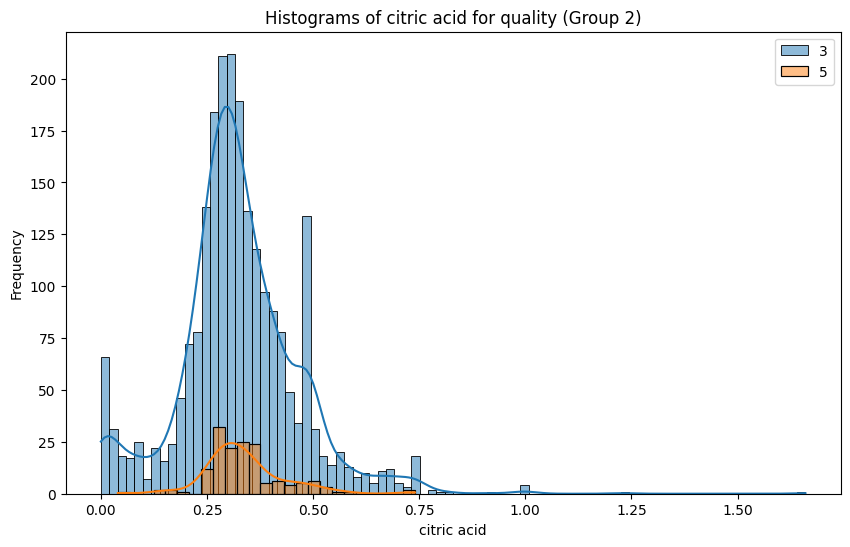

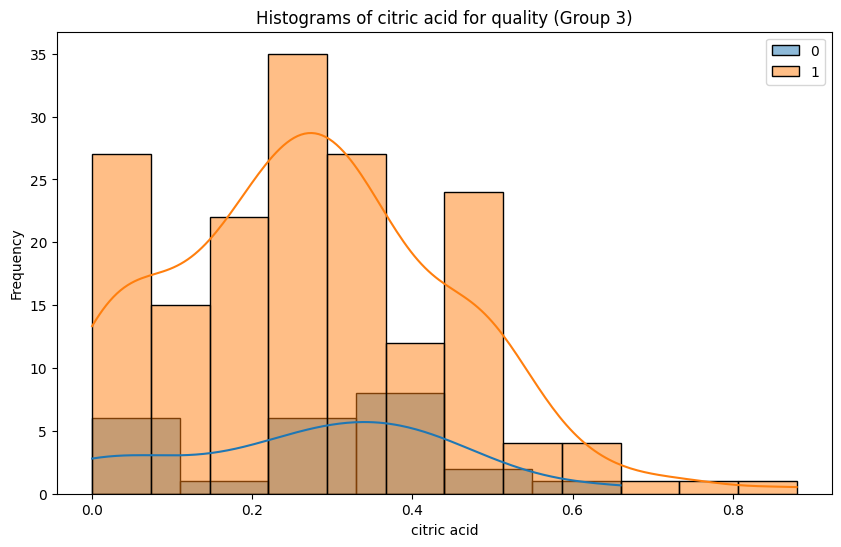

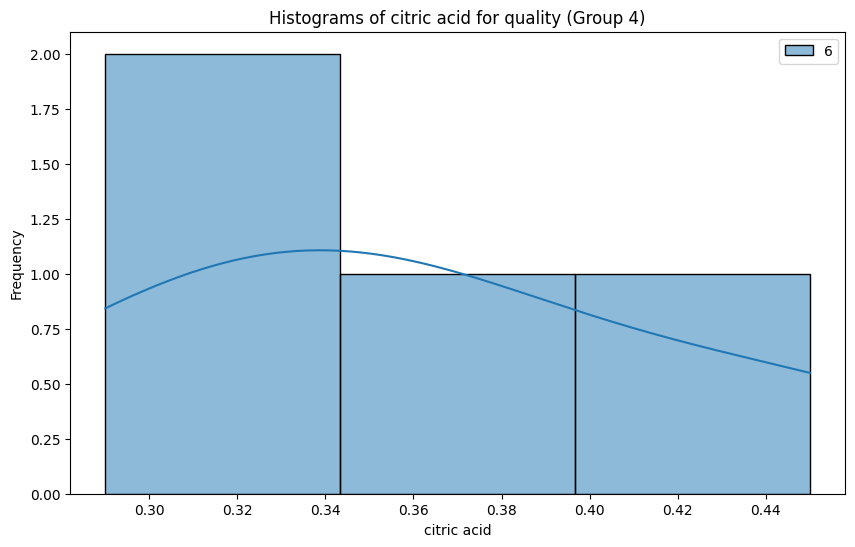

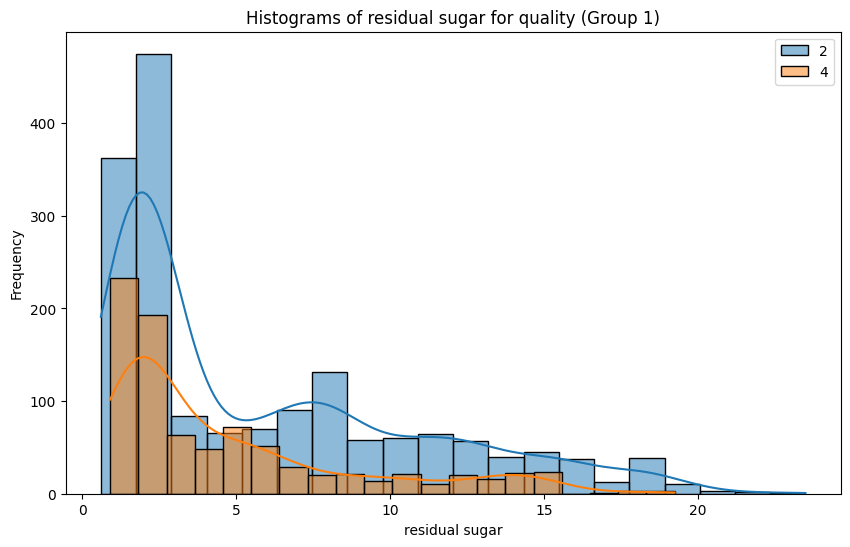

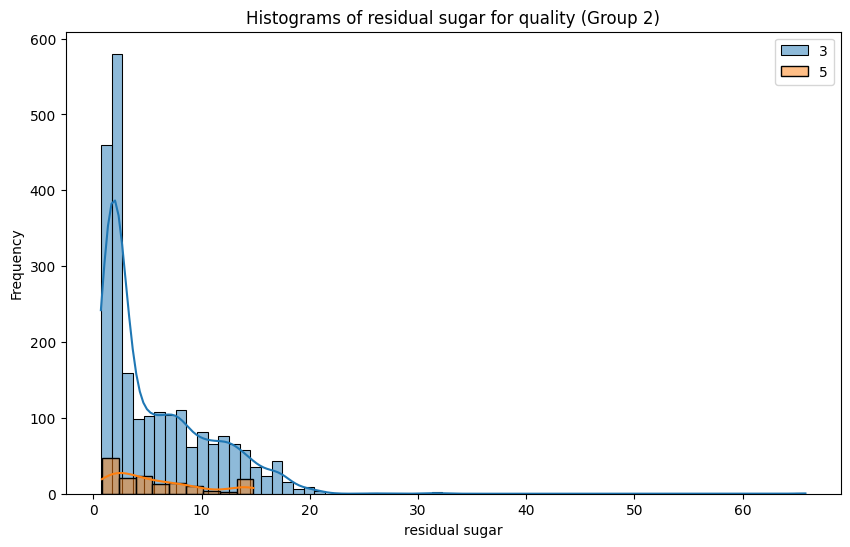

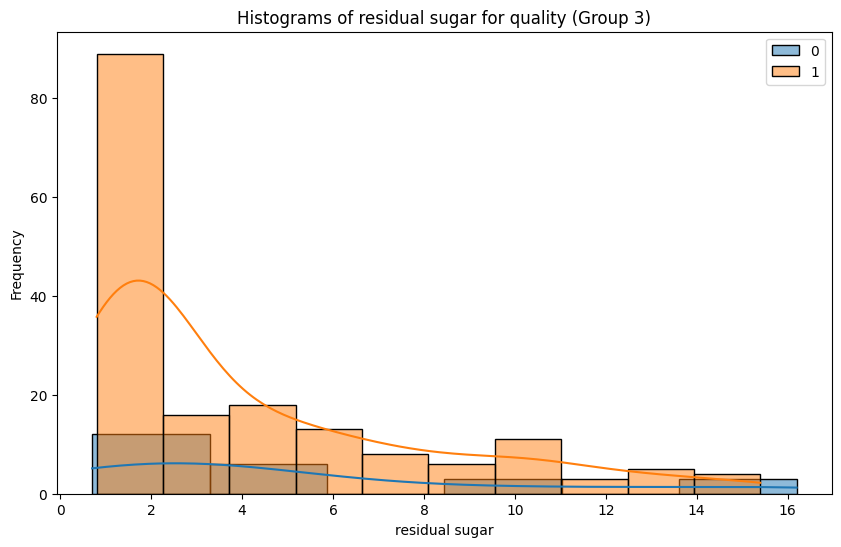

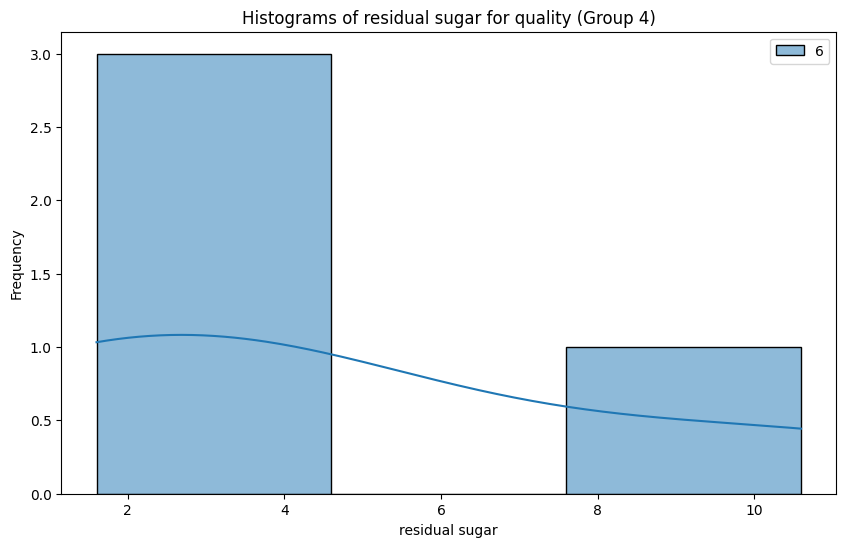

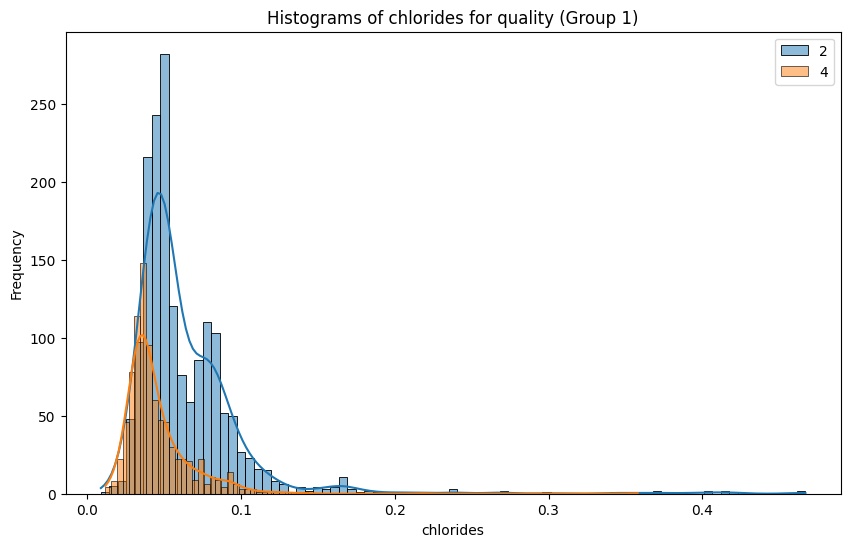

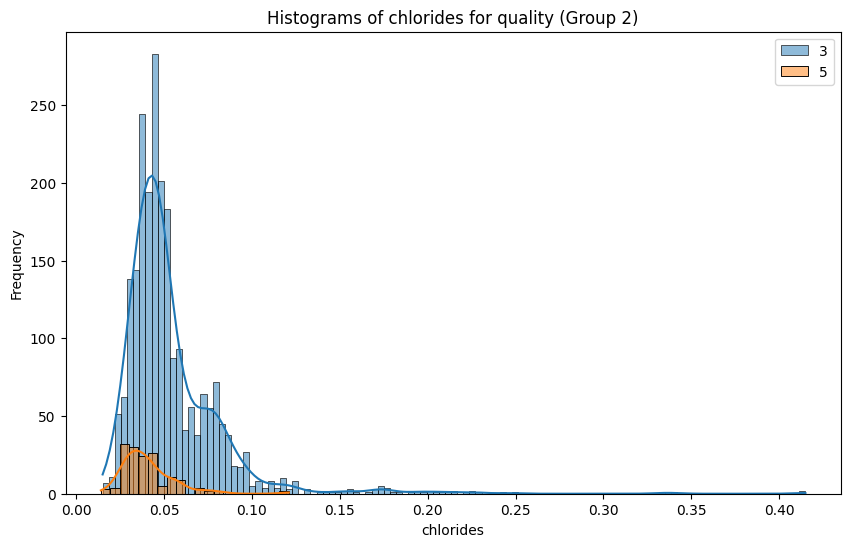

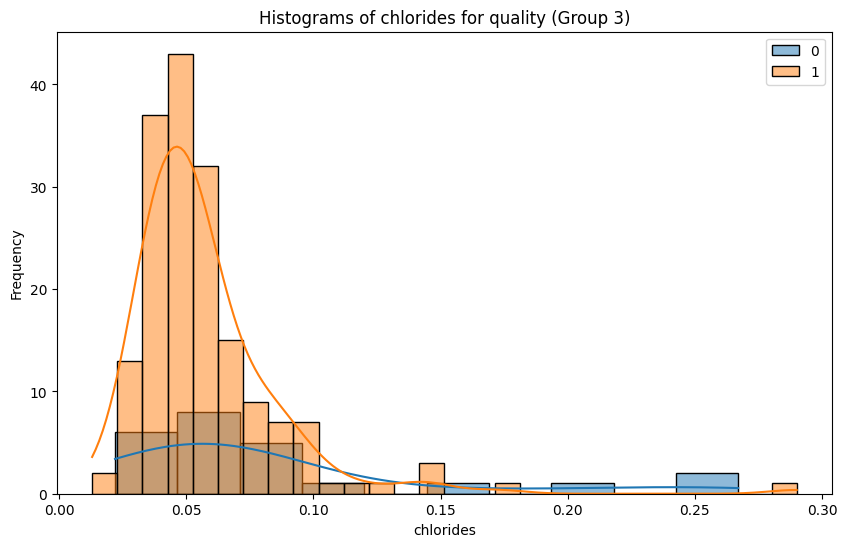

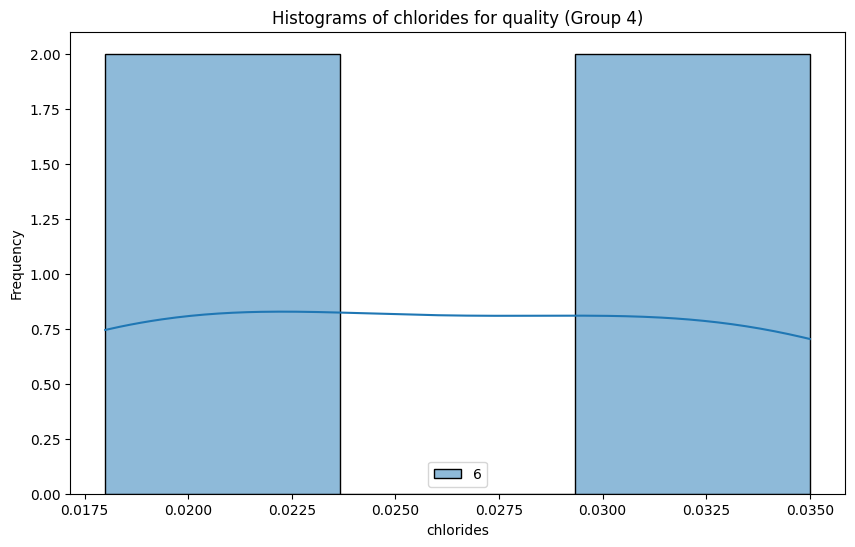

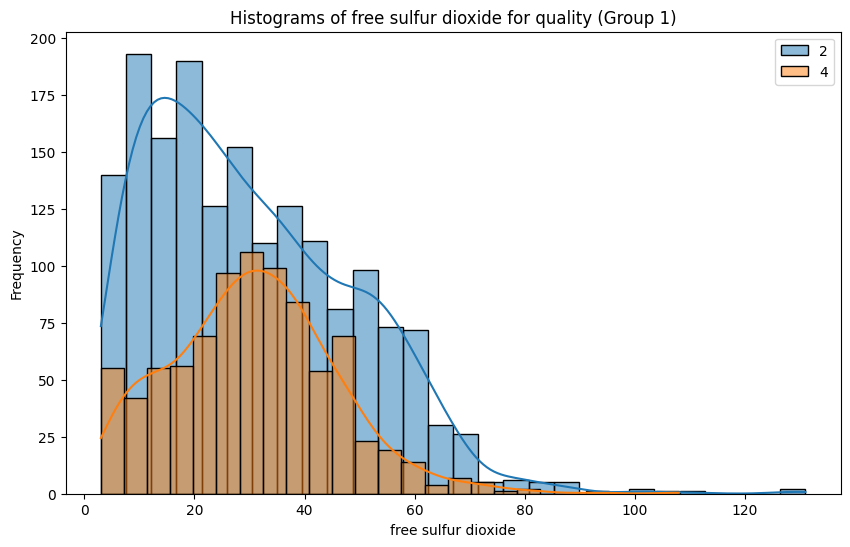

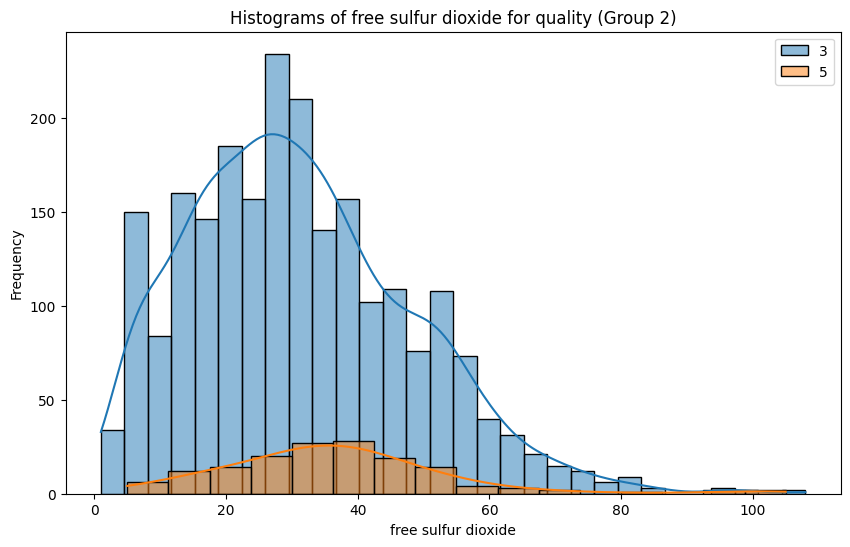

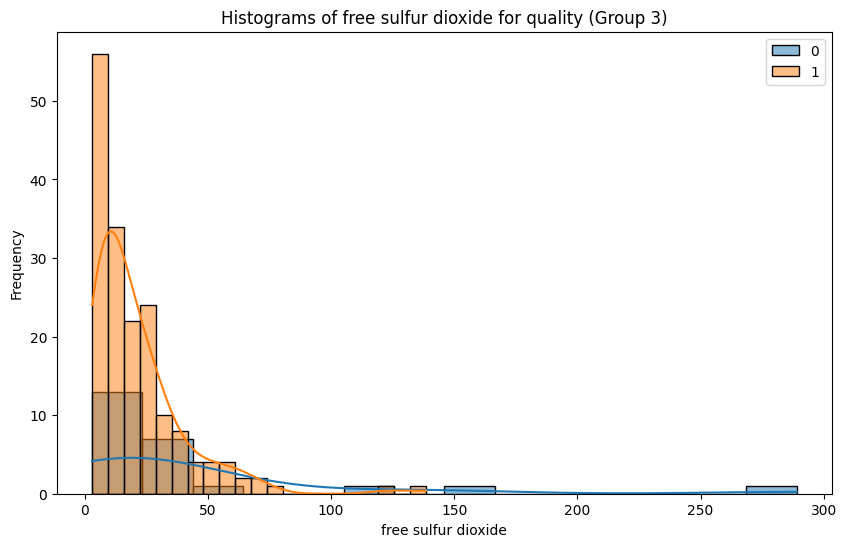

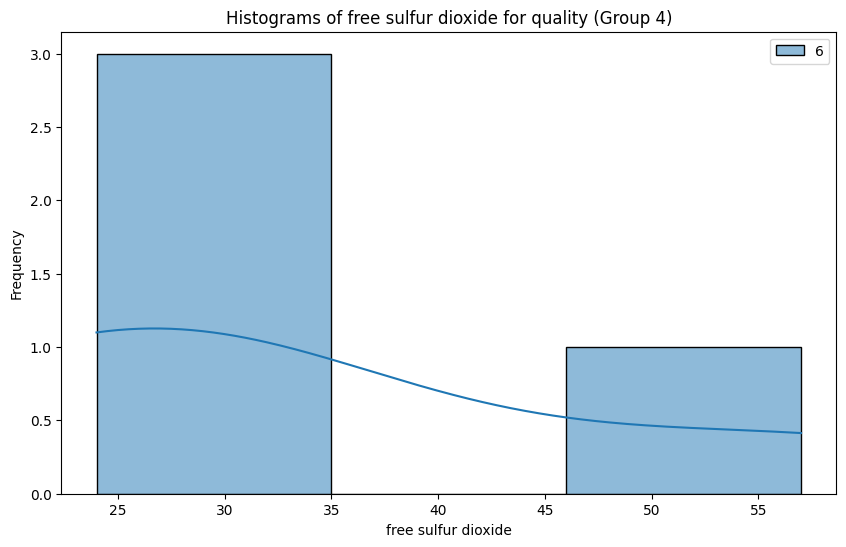

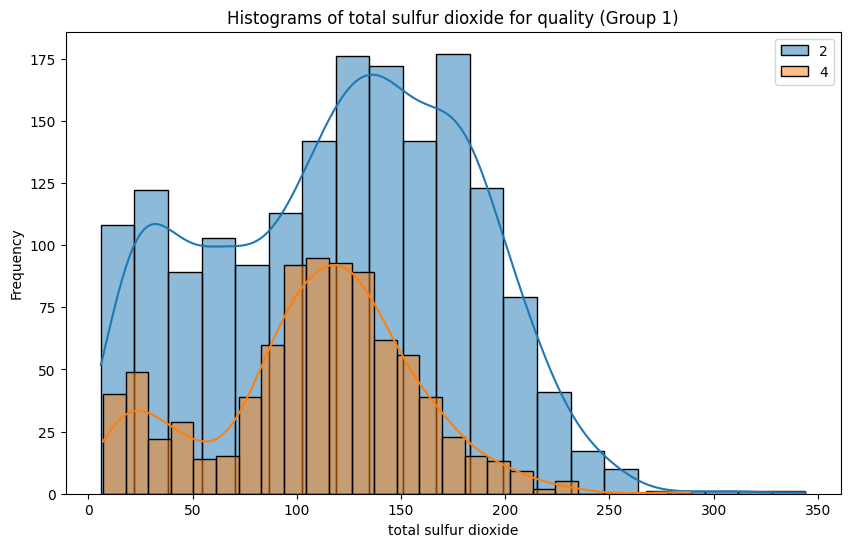

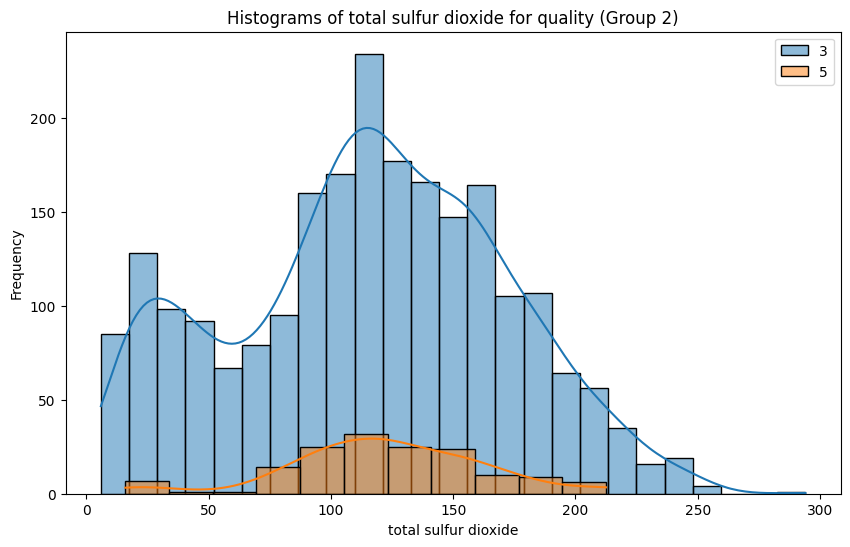

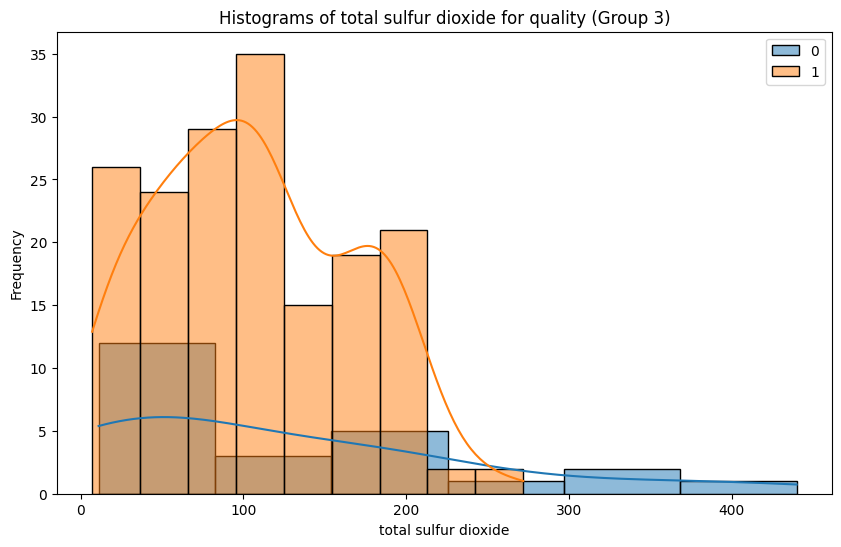

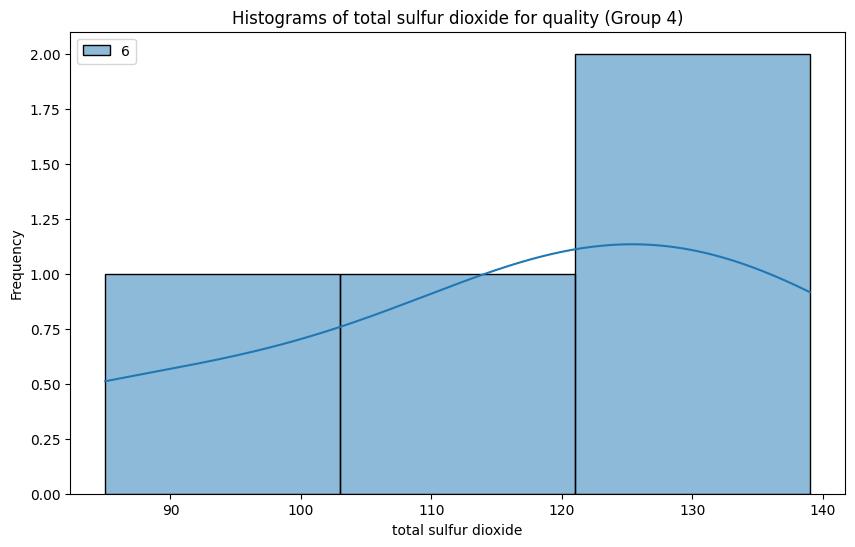

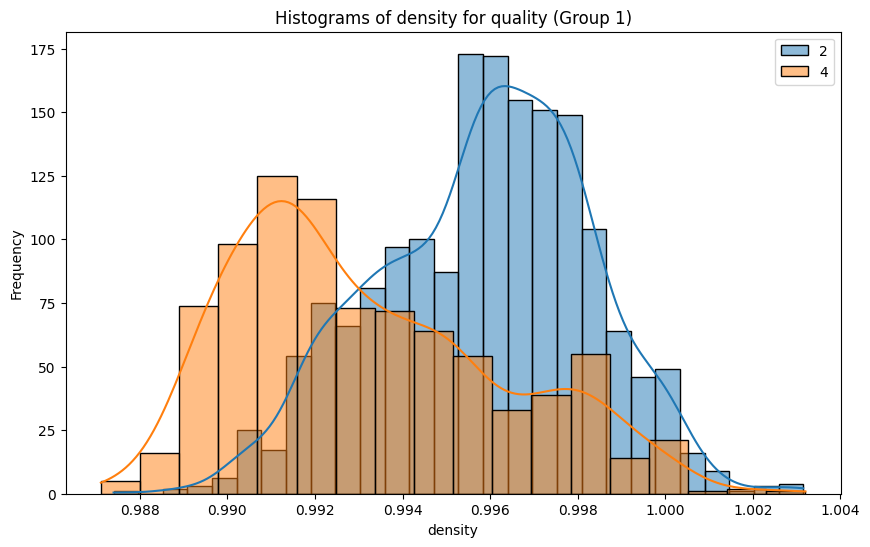

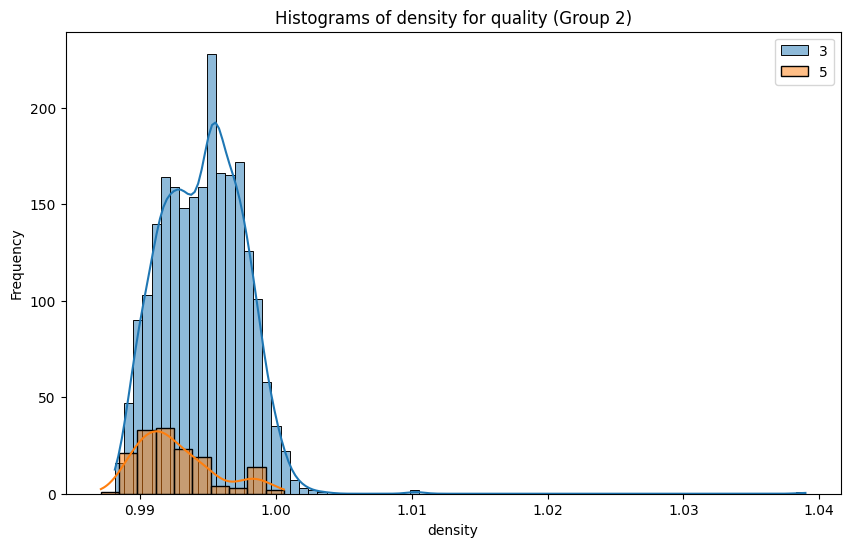

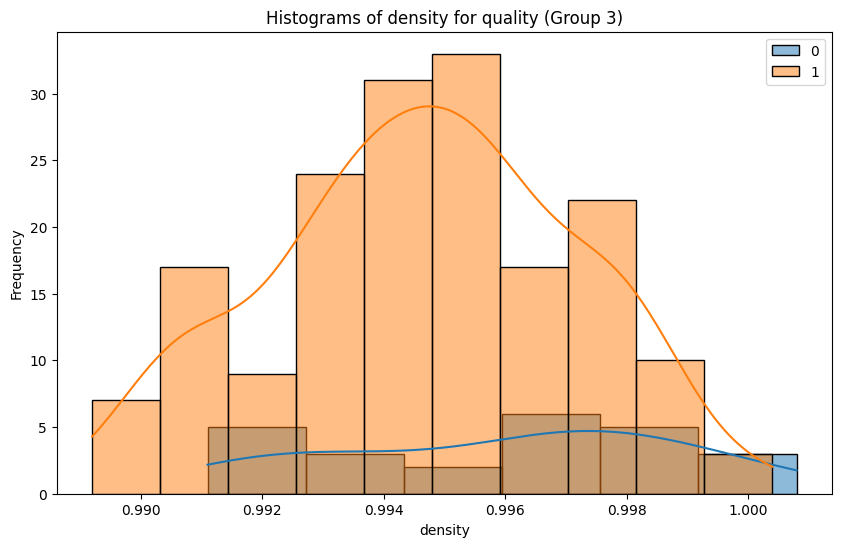

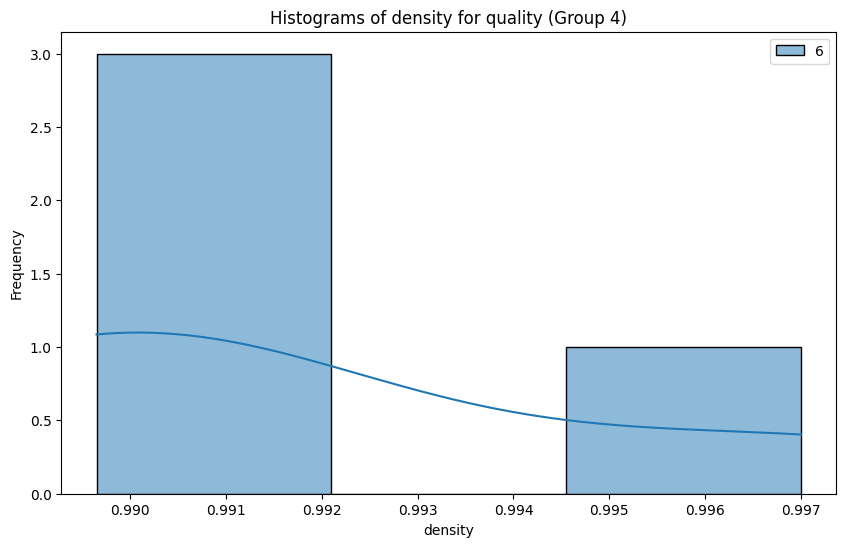

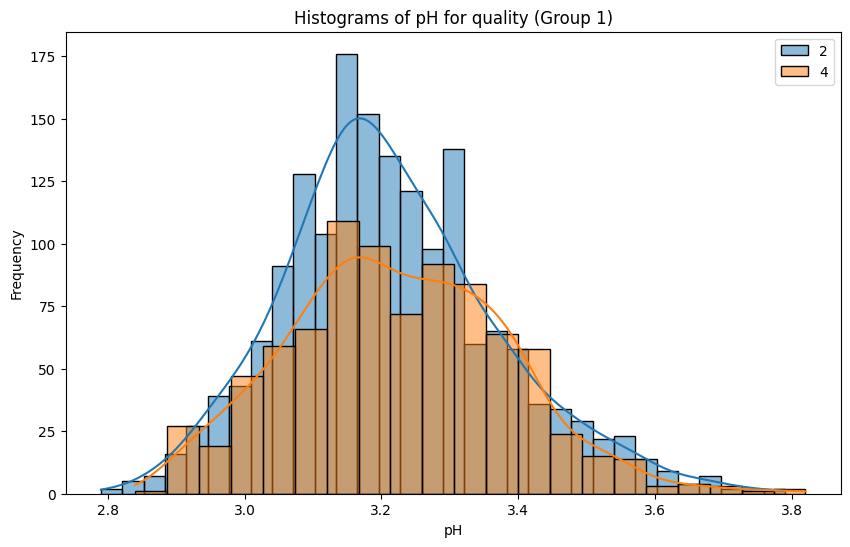

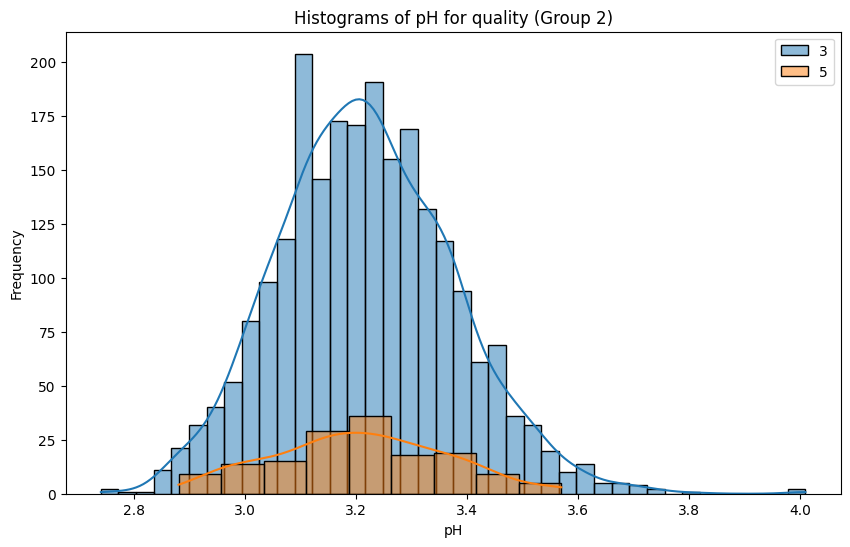

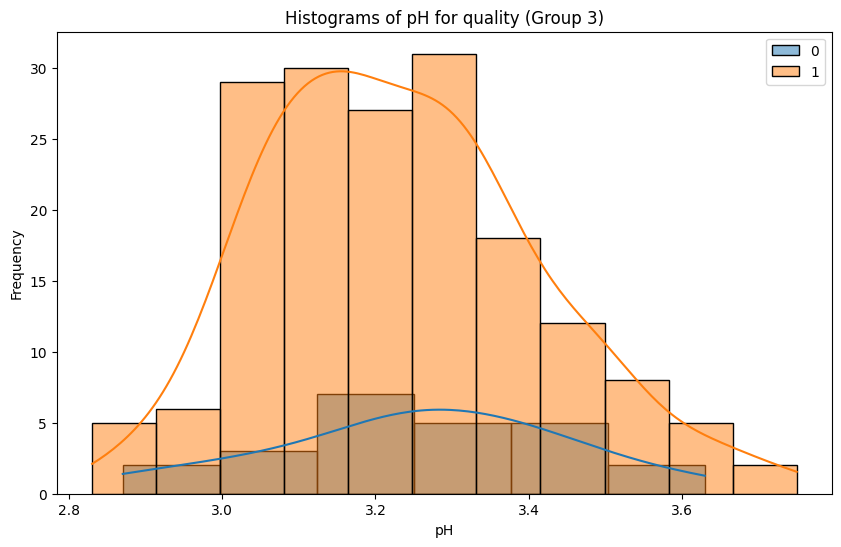

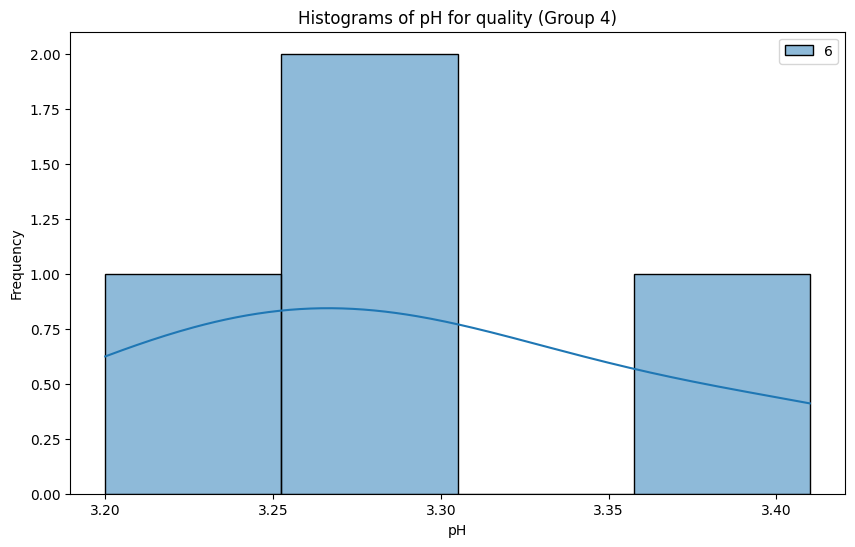

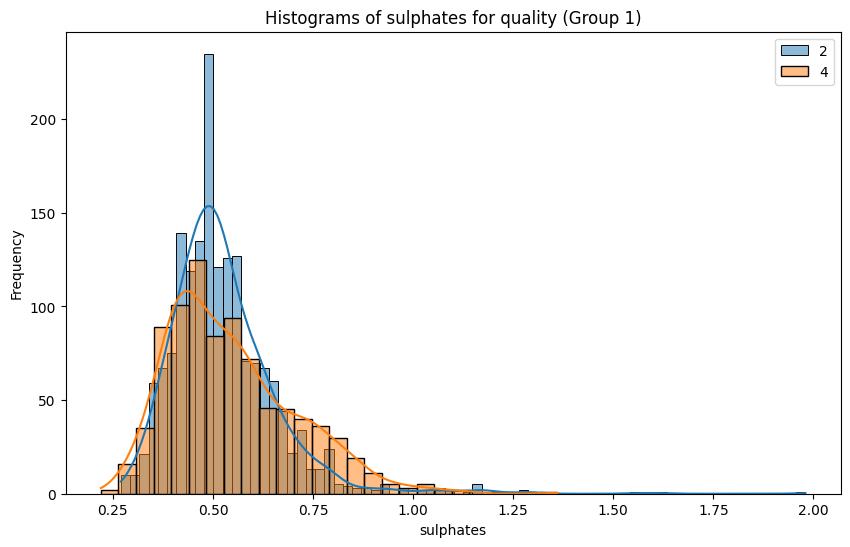

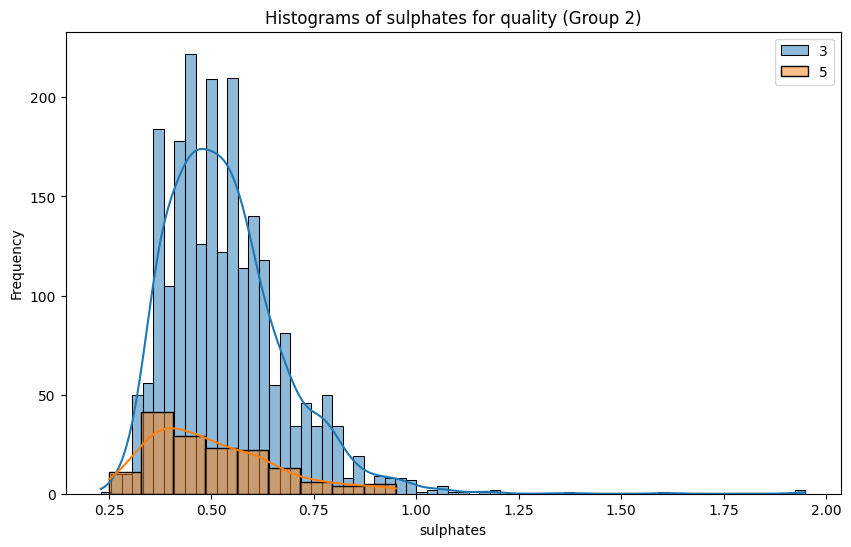

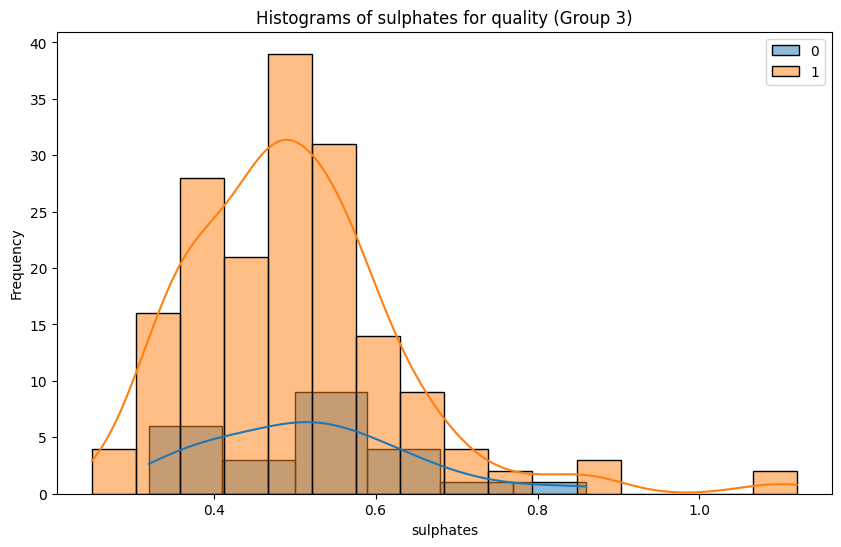

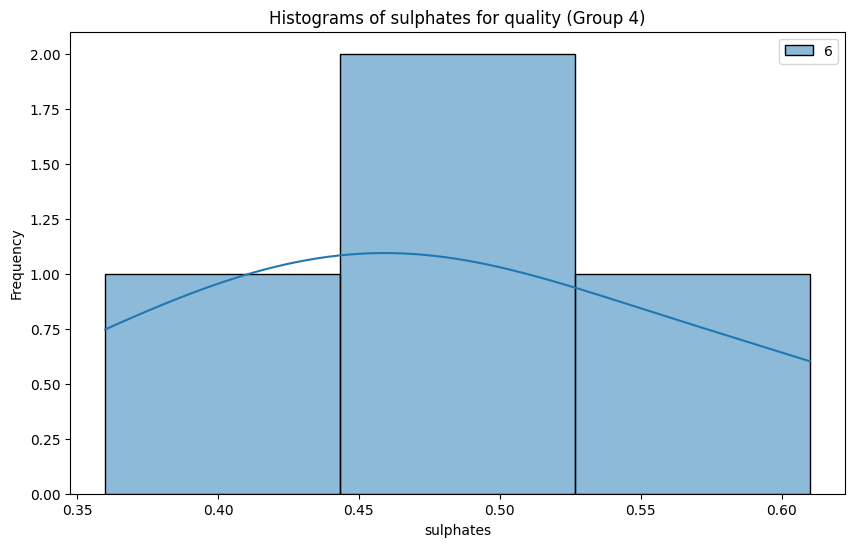

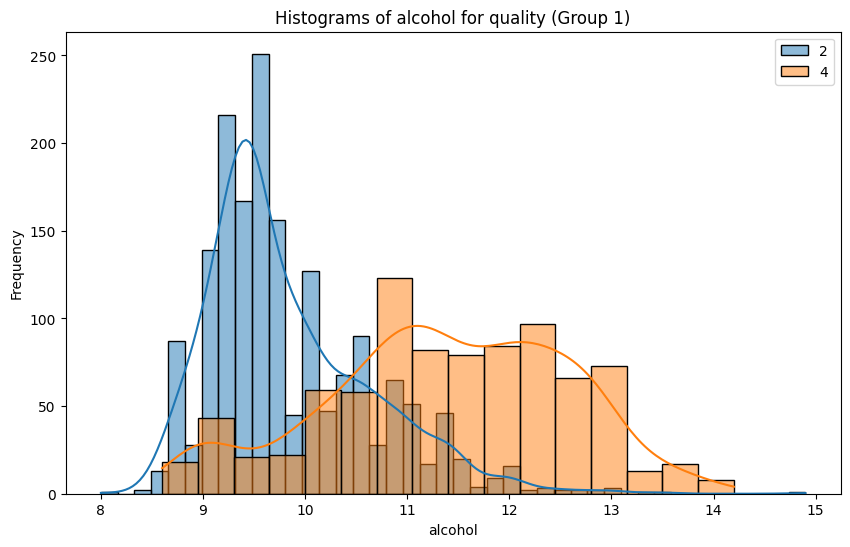

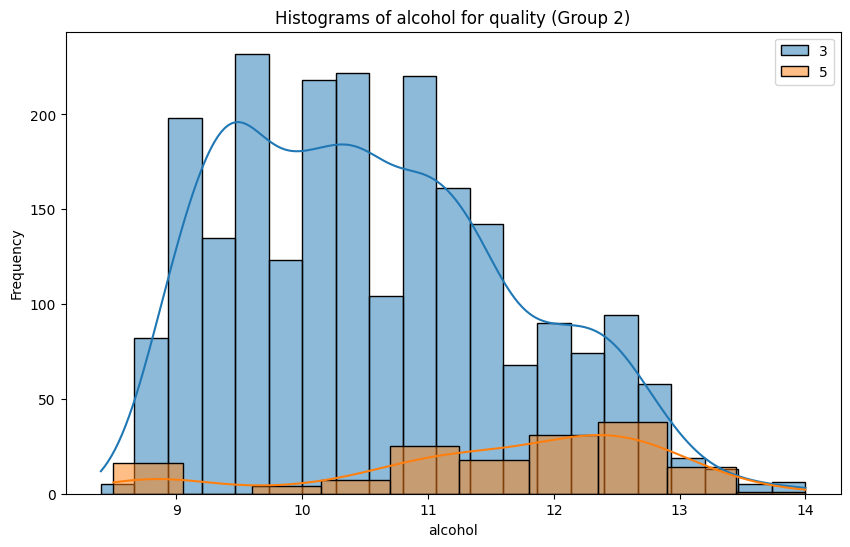

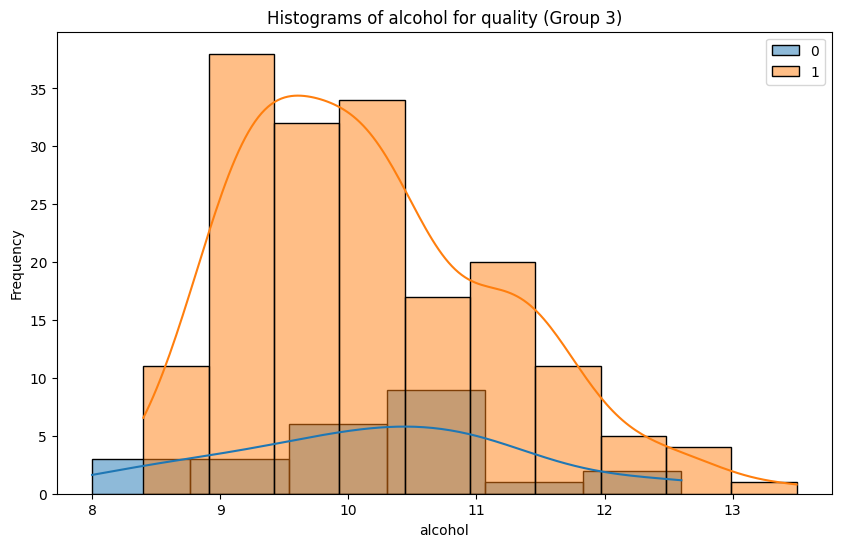

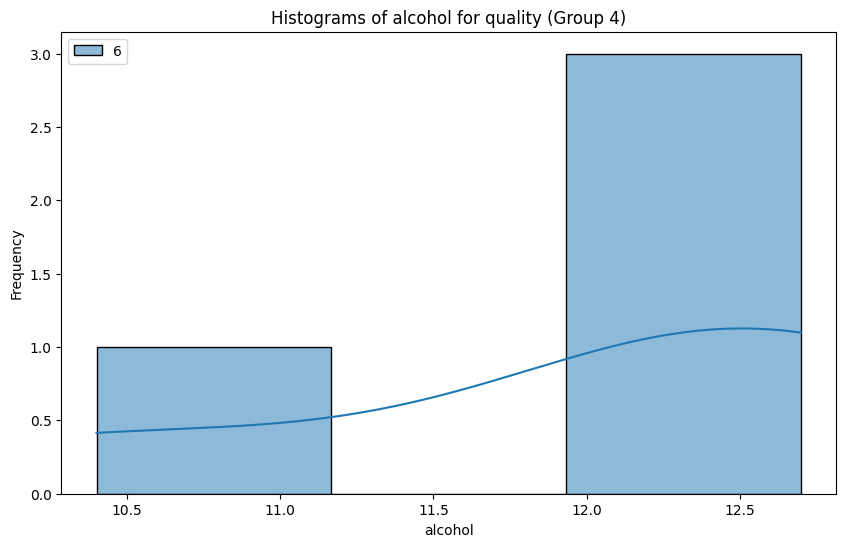

In [18]:
# distribución var.numérica
for col in features_num_1:
    bt.plot_grouped_histograms(train_set, cat_col= target_1, num_col= col, group_size= 2)

In [19]:
train_set["class"] == "red" # Máscara de booleanos de la variable class

5077    False
3917     True
2906     True
2878    False
5844     True
        ...  
4588    False
5849    False
5781    False
2977    False
6392     True
Name: class, Length: 5197, dtype: bool

In [20]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
5077,9.1,0.270,0.32,1.1,0.031,15.0,151.0,0.99360,3.03,0.41,10.6,2,white
3917,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,4,red
2906,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,2,red
2878,6.3,0.220,0.33,1.7,0.041,67.0,164.0,0.99280,3.32,0.56,10.4,3,white
5844,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,2,red


In [21]:
train_set["class"] = train_set["class"] == "red" # True = red, False = white

In [22]:
test_set["class"] = test_set["class"] == "red" # True = red, False = white

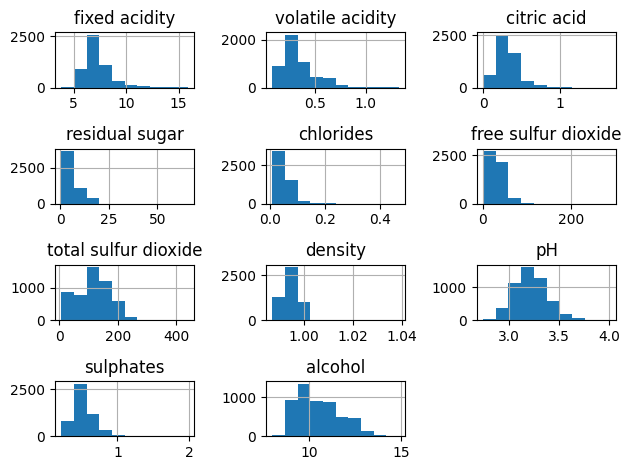

In [23]:
train_set[features_num_1].hist()
plt.tight_layout()

In [24]:
#escalamos las variables numéricas
scaler = StandardScaler()
train_set[features_num_1] = scaler.fit_transform(train_set[features_num_1])

In [25]:
train_set[features_num_1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-5.742312e-17,-4.375095e-17,-1.209987e-16,-1.121118e-16,1.948284e-16,3.144599e-17,5.332147e-17,-6.153844e-15,1.855314e-15,1.093774e-16,2.153367e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.624440e+00,-1.588689e+00,-2.188794e+00,-1.013442e+00,-1.382385e+00,-1.656896e+00,-1.942577e+00,-2.535681e+00,-2.998152e+00,-2.111844e+00,-2.091556e+00
25%,-6.322567e-01,-6.682072e-01,-5.358377e-01,-7.631162e-01,-5.288475e-01,-7.627690e-01,-6.889806e-01,-7.758709e-01,-6.773170e-01,-6.879393e-01,-8.257193e-01
50%,-1.725221e-01,-3.000143e-01,-5.372557e-02,-5.127902e-01,-2.639565e-01,-9.217401e-02,3.492696e-02,6.910382e-02,-5.006434e-02,-1.454995e-01,-1.506063e-01
75%,3.638349e-01,3.750060e-01,4.972597e-01,5.510954e-01,2.658254e-01,5.784210e-01,7.058657e-01,7.543983e-01,6.399136e-01,4.647452e-01,6.932851e-01
max,6.646875e+00,6.081996e+00,9.244151e+00,1.258760e+01,1.209762e+01,1.443738e+01,5.720250e+00,1.471977e+01,4.967957e+00,9.821831e+00,3.731294e+00


In [26]:
test_set[features_num_1] = scaler.transform(test_set[features_num_1])

In [27]:
X_train = train_set.drop(target_1, axis = 1)
y_train = train_set[target_1]

X_test = test_set.drop(target_1, axis = 1)
y_test = test_set[target_1]

In [28]:
y_train.value_counts()

quality
3    2269
2    1710
4     863
1     173
5     154
0      24
6       4
Name: count, dtype: int64

In [29]:
y_test.value_counts()

quality
3    567
2    428
4    216
1     43
5     39
0      6
6      1
Name: count, dtype: int64

In [30]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
knn_2 = KNeighborsClassifier(n_neighbors=15)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [32]:
acc_5 = accuracy_score(y_train, knn_1.predict(X_train))
acc_15 = accuracy_score(y_train, knn_2.predict(X_train))

print(f"Accuracy con k=5: {acc_5:.4f}")
print(f"Accuracy con k=15: {acc_15:.4f}")

Accuracy con k=5: 0.7077
Accuracy con k=15: 0.6121


Para hacer la posterior validación cruzada nos quedaremos con Knn_1

In [33]:
from lightgbm import LGBMClassifier

lgbm_clas = LGBMClassifier(random_state=42)
lgbm_clas.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.518884
[LightGBM] [Info] Start training from score -7.169542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier(random_state=42)

In [34]:
y_train.value_counts()

quality
3    2269
2    1710
4     863
1     173
5     154
0      24
6       4
Name: count, dtype: int64

In [35]:
import xgboost

xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
for nombre, modelo in zip(["KNN","LightGBM", "XGboost"],[knn_1, xgb_clas, lgbm_clas]):
    print(f"Para {nombre}:", end = " ")
    print(np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "accuracy")))

Para KNN: 

C:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.5412724883393796
Para LightGBM: 

C:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.6486482934774562
Para XGboost: [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1503
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score -5.336817
[LightGBM] [Info] Start training from score -3.405295
[LightGBM] [Info] Start training from score -1.111444
[LightGBM] [Info] Start training from score -0.828708
[LightGBM] [Info] Start training from score -1.795857
[LightGBM] [Info] Start training from score -3.520365
[LightGBM] [Info] Start training from score -7.233937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Según lo anterior el mejor modelo es lightgbm por lo que lo optimizamos.

In [37]:
from scipy.stats import randint, uniform
param_grid = {
    'num_leaves': randint(20, 100),                  # Número de hojas en el árbol
    'max_depth': randint(5, 50),                     # Profundidad máxima de los árboles
    'learning_rate': uniform(0.01, 0.2),             # Tasa de aprendizaje
    'n_estimators': randint(50, 500),                # Número de árboles
    'subsample': uniform(0.6, 0.4),                   # Fracción de muestras para cada árbol
    'colsample_bytree': uniform(0.6, 0.4),           # Fracción de características para cada árbol
    'min_child_samples': randint(10, 100),           # Mínimo de muestras en cada hoja
    'reg_alpha': uniform(0, 1),                      # Regularización L1
    'reg_lambda': uniform(0, 1)                      # Regularización L2
}

In [38]:
random_search = RandomizedSearchCV(
    estimator=lgbm_clas, 
    param_distributions=param_grid, 
    n_iter=50,               # Número de combinaciones aleatorias a probar
    scoring='accuracy',      # Métrica para optimización (puedes usar 'roc_auc', etc.)
    cv=3,                    # Validación cruzada de 3 pliegues
    verbose=1,               # Mostrar el progreso
    random_state=42,         # Para reproducibilidad
    n_jobs=-1                # Utilizar todos los núcleos del CPU
)

In [39]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.518884
[LightGBM] [Info] Start training from score -7.169542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A6B10FA40>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A6B10D6A0>,
                                        'max_depth': <scipy.stats._distn_infrastruc...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019A674E3290>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A6B10D820>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A6B10FE30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A6B10F3B0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [40]:
best_model = random_search.best_estimator_
print(best_model)

LGBMClassifier(colsample_bytree=0.7186040574591194,
               learning_rate=0.0939561712892553, max_depth=29,
               min_child_samples=33, n_estimators=62, num_leaves=79,
               random_state=42, reg_alpha=0.5113423988609378,
               reg_lambda=0.5015162946871996, subsample=0.9193180715867101)


In [41]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [42]:
accuracy

0.666923076923077

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [43]:
train_set_2, test_set_2 = train_test_split(df, test_size= 0.2, stratify= df['quality'], random_state= 42)

In [44]:
features_num_2 = [col for col in train_set.columns.to_list()]

In [45]:
features_num_2.remove(features_cat)

In [46]:
features_num_2.remove(target_1)

<Axes: xlabel='alcohol', ylabel='Count'>

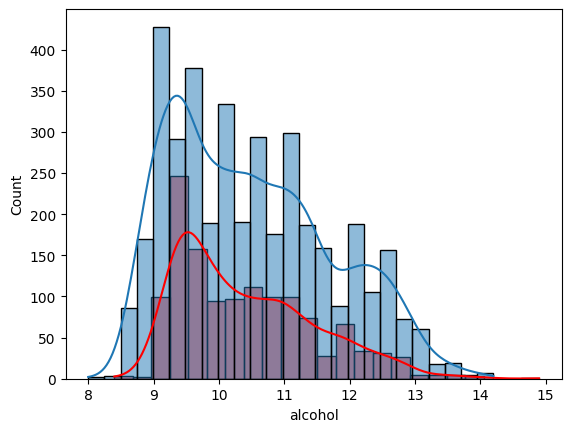

In [47]:
sns.histplot(x= target_2, data = train_set_2[train_set_2['class'] == 'red'], kde = True, color = "red")
sns.histplot(x= target_2, data = train_set_2[train_set_2['class'] == 'white'], kde = True)

In [48]:
corr = train_set_2.corr(numeric_only = True)

In [49]:
corr[target_2].sort_values(ascending = False)

alcohol                 1.000000
quality                 0.439689
pH                      0.113848
citric acid            -0.004981
sulphates              -0.005453
volatile acidity       -0.043211
fixed acidity          -0.085195
free sulfur dioxide    -0.175778
chlorides              -0.260342
total sulfur dioxide   -0.265385
residual sugar         -0.361373
density                -0.683073
Name: alcohol, dtype: float64

In [50]:
serie_corr = np.abs(corr[target_2]).sort_values(ascending = False)
serie_corr

alcohol                 1.000000
density                 0.683073
quality                 0.439689
residual sugar          0.361373
total sulfur dioxide    0.265385
chlorides               0.260342
free sulfur dioxide     0.175778
pH                      0.113848
fixed acidity           0.085195
volatile acidity        0.043211
sulphates               0.005453
citric acid             0.004981
Name: alcohol, dtype: float64

In [51]:
criterio = 0.26 # Fijamos un criterio para seleccionar nuestras features numéricas

features_num_2cor = serie_corr[serie_corr > criterio].index.to_list()
features_num_2cor.remove(target_2) # Quitamos el target

In [52]:
features_num_2cor

['density', 'quality', 'residual sugar', 'total sulfur dioxide', 'chlorides']

In [53]:
criterio_col = 0.7
excluidas = []
corr_numeric = train_set_2[features_num_2cor].corr(numeric_only = True)

for col in features_num_2cor:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features_num_2cor:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de density
	Comprobando density con density
		Son la misma variable, no comprobamos
	Comprobando density con quality
		density correla con quality al -0.2955, mantenemos quality
	Comprobando density con residual sugar
		density correla con residual sugar al 0.5536, mantenemos residual sugar
	Comprobando density con total sulfur dioxide
		density correla con total sulfur dioxide al 0.0300, mantenemos total sulfur dioxide
	Comprobando density con chlorides
		density correla con chlorides al 0.3695, mantenemos chlorides
Comprobando colinealidad de quality
	Comprobando quality con density
		quality correla con density al -0.2955, mantenemos density
	Comprobando quality con quality
		Son la misma variable, no comprobamos
	Comprobando quality con residual sugar
		quality correla con residual sugar al -0.0295, mantenemos residual sugar
	Comprobando quality con total sulfur dioxide
		quality correla con total sulfur dioxide al -0.0410, mantenemos total sulfur dioxide
	

Tras el análisis de la colinealidad no eliminamos ninguna feature mas.

<Axes: >

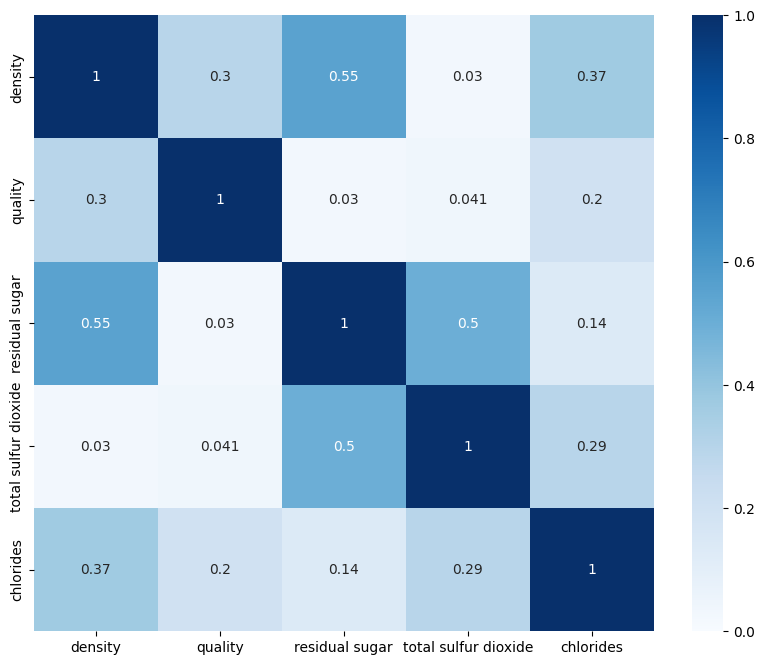

In [54]:
plt.figure(figsize = (10,8))
sns.heatmap(np.abs(train_set_2[features_num_2cor].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1)

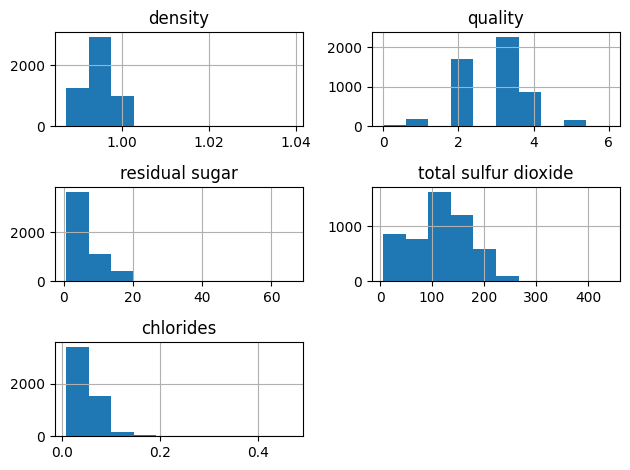

In [55]:
train_set_2[features_num_2cor].hist()
plt.tight_layout()

In [56]:
train_set_2[features_num_2cor] = scaler.fit_transform(train_set_2[features_num_2cor])

In [57]:
test_set_2[features_num_2cor] = scaler.transform(test_set_2[features_num_2cor])

In [58]:
train_set_2[features_num_2cor].describe()

,density,quality,residual sugar,total sulfur dioxide,chlorides
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-6.153844e-15,-1.797891e-16,-1.121118e-16,5.332147e-17,1.948284e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.535681e+00,-3.227983e+00,-1.013442e+00,-1.942577e+00,-1.382385e+00
25%,-7.758709e-01,-9.371420e-01,-7.631162e-01,-6.889806e-01,-5.288475e-01
50%,6.910382e-02,2.082783e-01,-5.127902e-01,3.492696e-02,-2.639565e-01
75%,7.543983e-01,2.082783e-01,5.510954e-01,7.058657e-01,2.658254e-01
max,1.471977e+01,3.644539e+00,1.258760e+01,5.720250e+00,1.209762e+01


In [59]:
# tratamiento de categóricas
train_set_2["class"] = train_set_2["class"] == "red" # Máscara de booleanos de la variable class

In [60]:
test_set_2["class"] = test_set["class"] == "red"

In [61]:
train_set_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
5077,9.1,0.270,0.32,-0.909140,-0.734874,15.0,0.617584,-0.376670,3.03,0.41,10.6,-0.937142,False
3917,15.0,0.210,0.44,-0.679674,0.560149,10.0,-1.624764,1.769033,3.07,0.84,9.2,1.353699,True
2906,8.6,0.725,0.24,0.238188,1.796307,31.0,0.317427,2.218134,3.32,1.07,9.3,-0.937142,True
2878,6.3,0.220,0.33,-0.783977,-0.440550,67.0,0.847116,-0.642804,3.32,0.56,10.4,0.208278,False
5844,8.3,0.655,0.12,-0.658814,0.795607,15.0,-0.053354,0.621331,3.17,0.66,9.8,-0.937142,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,6.7,0.230,0.31,-0.700535,-0.293389,30.0,-0.353511,-0.709337,3.33,0.64,10.7,2.499119,False
5849,6.7,0.210,0.49,-0.846558,-0.263957,30.0,-0.035698,-1.108538,2.92,0.42,10.8,1.353699,False
5781,6.9,0.230,0.34,-0.575372,-0.705441,24.0,0.087896,-1.507739,3.14,0.38,12.4,1.353699,False
2977,6.2,0.270,0.26,1.385515,-0.293389,43.0,0.193834,0.122331,3.16,0.37,10.8,0.208278,False


In [62]:
X_train_2 = train_set_2.drop(target_2, axis = 1)
y_train_2 = train_set_2[target_2]

X_test_2 = test_set_2.drop(target_2, axis = 1)
y_test_2 = test_set_2[target_2]

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_2, y_train_2)

LinearRegression()

In [64]:
# regresión polinómica
degree = 3  

# Transformar las características de entrada
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_2)


In [65]:
poly = LinearRegression()

# Ajustar el modelo con las características transformadas
poly.fit(X_train_poly, y_train_2)

LinearRegression()

In [67]:
#elastic_net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha=1.0 es la penalización, l1_ratio=0.5 mezcla Lasso y Ridge

elastic_net.fit(X_train_2, y_train_2)

ElasticNet()

In [73]:
for nombre, modelo in zip(["Lineal","Polinónima", "Elastic"],[lin_reg, poly, elastic_net]):
    print(f"Para {nombre}:", end = " ")
    print(np.mean(-cross_val_score(modelo, X_train_2, y_train_2, cv = 5, scoring = "neg_root_mean_squared_error")))

Para Lineal: 0.5144365642502713
Para Polinónima: 0.5144365642502713
Para Elastic: 1.0374486982716564


In [75]:
#opyimizamos elasticnet
param_grid = {
    'alpha': np.logspace(-4, 4, 50),  # Valores de alpha desde 10^-4 a 10^4
    'l1_ratio': np.linspace(0, 1, 10)  # Proporción entre Lasso y Ridge, de 0 (Ridge) a 1 (Lasso)
}

In [76]:
random_search = RandomizedSearchCV(
    estimator=elastic_net,
    param_distributions=param_grid,
    n_iter=100,  # Número de combinaciones a probar
    scoring='neg_root_mean_squared_error',  # Usar RMSE para evaluar el rendimiento
    cv=5,  # Número de pliegues para la validación cruzada
    random_state=42,  # Para garantizar resultados reproducibles
    n_jobs=-1  # Usar todos los núcleos disponibles en tu máquina
)

In [77]:
random_search.fit(X_train_2, y_train_2)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.0949...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [78]:
random_search.best_params_

{'l1_ratio': 0.2222222222222222, 'alpha': 0.00021209508879201905}

In [79]:
-random_search.best_score_

0.5144110232087589

In [82]:
# Usamos el mejor modelo encontrado en la búsqueda aleatoria
best_model = random_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_2 = best_model.predict(X_test_2)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
print(rmse_test)

0.7006585159616908


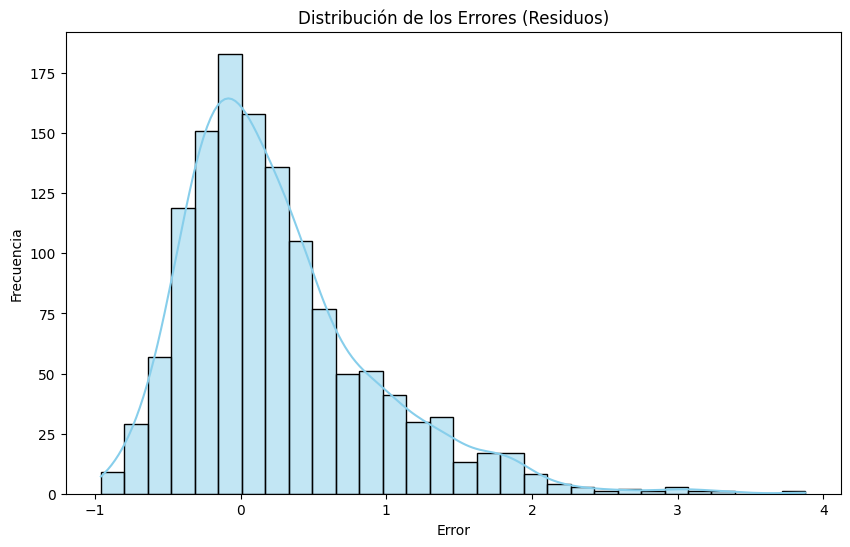

In [85]:
# análisis de errores
#histograma errores
errors = y_test_2 - y_pred_2

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='skyblue')
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

Como está desplazado hacia la izquierda los errores negativos son más frecuentes que los errores positivos lo que significa que el modelo tiende a sobreestimar los valores reales, por lo que las predicciones son en promedio mayores que las reales.

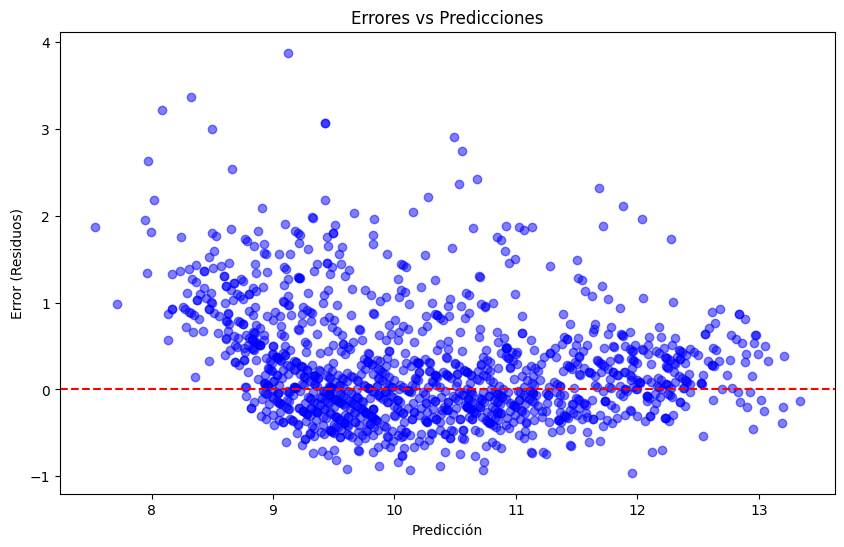

In [86]:
# Grafico errores vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_2, errors, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Errores vs Predicciones')
plt.xlabel('Predicción')
plt.ylabel('Error (Residuos)')
plt.show()

Aparentemente puede presentar heterocedasticidad ya que a mayores predicciones disminuye la dispersión. Para corregirlo se podrían haber usado estimadores más robustos o agregar más variables explicativas al modelo. 